# Data Science job market in the U.S

## INTRODUCTION

Big Data, Machine Learning, Deep Learning, Artificial Intelligence…the buzzwords are many for data in the IT Industry. Do we know what skillset do we need to gain expertise in data? To answer the questions, this project intends to study what makes a Data Scientist tick in the U.S. What is the data scientist job market scenario in the U.S, and what are the factors that differentiate data scientists, data analysts, and a data engineer? According to the August 2018 report of LinkedIn, there was a shortage of data scientists for the job positions with particularly acute shortages in cities like New York, San Francisco, Boston, and Los Angeles. Since the number of data scientists is increasing this year, this project tends to find out who are the ones that are getting hired. This analysis will help the job hunters to understand the scenario of the job market in the U.S better.

## QUESTIONS ANSWERED

#### 1. Who gets hired?

#### 2. Who gets hired?

#### 3. What skills are required, what kind of talent the employers want when they are hiring?

#### 4. Which location has the most opportunities?

#### 5. What are the tools, degree, and skills required to get hired as a data scientist?

#### 6. What is the difference between a data scientist, data analyst, and data engineer?




#### We are creating a workbook which shall provide market insights to the job scenario in the U.S. for Data Scientists. Hence, this shall benefit :-

1.Employee – Provides an opportunity to the current employees to upskill their skill set

2.Employer – Gain insights to the changing market landscape

3.Students – To Familiarize themselves with positions like data analyst, data scientist, data engineer and what skill set would suffice for them to make their career in any of them.

In [28]:
# Import all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

In [4]:
cd C:\Users\Aishwarya Dev\Desktop\1st Sem\IDS\Project

C:\Users\Aishwarya Dev\Desktop\1st Sem\IDS\Project


In [5]:
pwd

'C:\\Users\\Aishwarya Dev\\Desktop\\1st Sem\\IDS\\Project'

In [6]:
df=pd.read_csv("alldata.csv")
df.head(20)

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"
5,Manager of Data Engineering,McKinsey & Company,Qualifications\nBachelor’s degree in Computer ...,385.0,"Atlanta, GA 30318"
6,"Product Specialist - Periscope, New Ventures",McKinsey & Company,Qualifications\nBachelor’s degree\n5-7 years o...,385.0,"Atlanta, GA 30318"
7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,Overview / Responsibilities\nWood Environment ...,899.0,"Atlanta, GA"
8,Analyst - CIB Credit Research,SunTrust,Works closely with senior CIB professionals. P...,3343.0,"Atlanta, GA"
9,Senior Associate - Cognitive Data Scientist Na...,KPMG,Known for being a great place to work and buil...,4494.0,"Atlanta, GA 30338"


In [7]:
df[df.duplicated()]

,position,company,description,reviews,location
331,NaN,NaN,NaN,NaN,NaN
466,NaN,NaN,NaN,NaN,NaN
482,NaN,NaN,NaN,NaN,NaN
3337,NaN,NaN,NaN,NaN,NaN
5014,NaN,NaN,NaN,NaN,NaN
5059,NaN,NaN,NaN,NaN,NaN
5103,NaN,NaN,NaN,NaN,NaN
5114,NaN,NaN,NaN,NaN,NaN
6093,NaN,NaN,NaN,NaN,NaN
6168,NaN,NaN,NaN,NaN,NaN


In [8]:
df.skew(axis = 0, skipna = True)

reviews    6.42776
dtype: float64

Skew is: 0.08040888937786761


C:\mili\Softwares\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\mili\Softwares\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


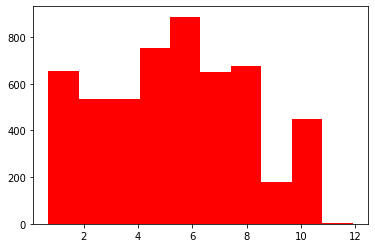

In [9]:
target = np.log(df.reviews)
print("Skew is:", target.skew())
plt.hist(target, color="red")
plt.show()

In [1]:
#Now, we are finding total number of companies who require data scientist
total_no_company=df['company'].nunique()
print('Toatl number of firms with data science job vacancies',total_no_company)

#finding highest number of vacancy in a company
most_vacancy= df.groupby(['company'])['position'].count()
most_vacancy=most_vacancy.reset_index(name='position')
most_vacancy=most_vacancy.sort_values(['position'],ascending=False)
pareto_df=most_vacancy
most_vacancy=most_vacancy.head(25)
print('Top 10 firms with most vacancies',most_vacancy)

# Plot graph for top most vacancy
fig, ax = plt.subplots(figsize = (10,6))
ax=sns.barplot(x="company", y="position", data=most_vacancy)    
ax.set_xticklabels(most_vacancy['company'],rotation=90)  
ax.set_xlabel('COMPANY WITH MOST JOBS',fontsize=16, color='red')
ax.set_ylabel('# OF JOBS',fontsize=16,color='red') 

NameError: name 'df' is not defined

Toatl number of roles across all the firms 5242
Top 15 most wanted roles across firms                                  position  company
1026                       Data Scientist      351
3833                Senior Data Scientist       96
3115                     Research Analyst       64
928                         Data Engineer       60
2152            Machine Learning Engineer       56
2071                  Lead Data Scientist       31
3276                   Research Scientist       30
4685                   Sr. Data Scientist       28
2660             Principal Data Scientist       24
879                          Data Analyst       22
4443                    Software Engineer       22
2977                 Quantitative Analyst       21
3486                            Scientist       17
2837                      Product Manager       17
495              Bioinformatics Scientist       16
2300              Market Research Analyst       15
4245             Senior Software Engineer      

Text(0, 0.5, 'NO OF ROLES ACROSS INDUSTRY')

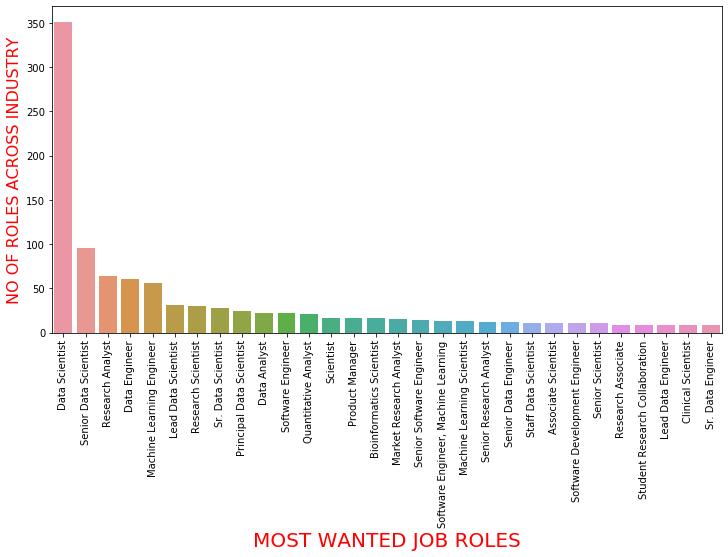

In [11]:
# Finding total number of unique roles in data science domain from the given dataset
total_no_roles=df['position'].nunique()
print('Toatl number of roles across all the firms',total_no_roles)

# most offered roles across all the firms
most_offd_roles=df.groupby(['position'])['company'].count()   
most_offd_roles=most_offd_roles.reset_index(name='company')
most_offd_roles=most_offd_roles.sort_values(['company'],ascending=False)
most_offd_roles=most_offd_roles.head(30)   
print('Top 15 most wanted roles across firms',most_offd_roles)

# Plot graph for top most offered roles
fig,ax=plt.subplots(figsize=(12,6))
ax=sns.barplot(x="position", y="company", data=most_offd_roles)    
ax.set_xticklabels(most_offd_roles['position'],rotation=90)
ax.set_xlabel('MOST WANTED JOB ROLES',fontsize=20,color='red')
ax.set_ylabel('NO OF ROLES ACROSS INDUSTRY',fontsize=16,color='red')

Text(0.5, 0, 'Company Name')

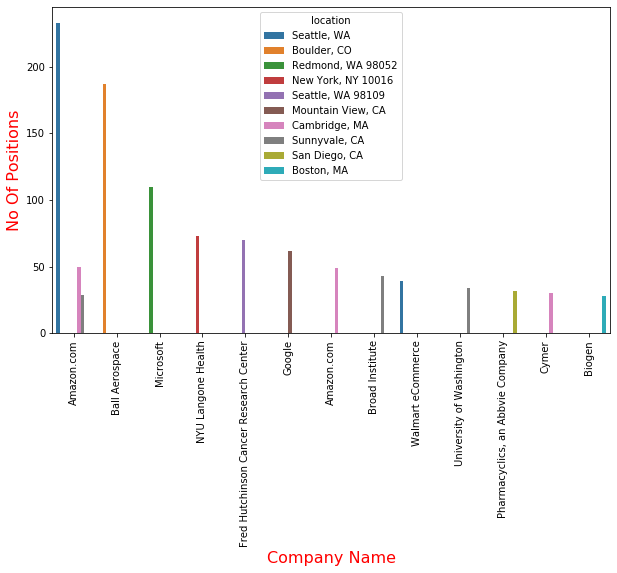

In [12]:
# Finding total number of cities with Data science jobs
total_no_cities=df['location'].nunique()

#cities and total no of openings w.r.t companies
city_and_roles=df.groupby(['location','company'])['position'].count()     
city_and_roles=city_and_roles.reset_index()
city_and_roles=city_and_roles.sort_values(['position'],ascending=False)
city_and_roles=city_and_roles.head(15) 

# Plot graph for top most cities and no of roles
fig,a=plt.subplots(figsize=(10,6))             
a=sns.barplot(x="company", y="position", hue="location", data=city_and_roles);    
a.set_xticklabels(city_and_roles['company'],rotation=90)   
a.set_ylabel('No Of Positions',fontsize=16,color='red')
a.set_xlabel('Company Name',fontsize=16,color='red')

In [13]:
df['location'].value_counts().head(100)

Seattle, WA                563
New York, NY               508
Cambridge, MA              487
Boston, MA                 454
San Francisco, CA          425
San Diego, CA              294
Chicago, IL                292
Boulder, CO                233
Washington, DC             230
Sunnyvale, CA              221
Mountain View, CA          199
Los Angeles, CA            187
Austin, TX                 156
Atlanta, GA                147
Redmond, WA 98052          117
Seattle, WA 98109           95
Cambridge, MA 02139         95
New York, NY 10016          83
San Diego, CA 92121         71
Cambridge, MA 02142         64
South San Francisco, CA     53
Chicago, IL 60654           45
San Francisco, CA 94103     40
Chicago, IL 60601           40
Redmond, WA                 39
Mountain View, CA 94043     39
Seattle, WA 98104           34
Seattle, WA 98101           34
Cambridge, MA 02140         33
Boston, MA 02116            31
                          ... 
New York, NY 10179          11
Chicago,

In [14]:
#find the total job openings
total_job_openings=len(df['position'])

#find 80% total job (total_job_openings) openings, pareto rule,can be (80,20) 
sum_80_percent_job_openings=total_job_openings/100*80

#find 20% total number of companies
sum_20_percent_companies=total_no_company/100*20

#now find the total number of job openings from those 20% top comapnies 
top_20_companies_job_openings=pareto_df.head(443)

sum_=top_20_companies_job_openings['position'].sum()

print('80% of the total job openings is :',sum_80_percent_job_openings )

print('total job openings from top 20% of the companies :',sum_)

print ('so, 80% of the total job openings and total job openings from top 20% of the companies are almost equal. Therefore we can say that the data set follows Pareto Rule')

80% of the total job openings is : 5571.2
total job openings from top 20% of the companies : 4675
so, 80% of the total job openings and total job openings from top 20% of the companies are almost equal. Therefore we can say that the data set follows Pareto Rule


In [15]:
#PART 3 MACHINE LEARNING
#there are so many job profiles in the given dataset so lets Categories them into 5; Data Scientist, 
#Machine Learning Engineer, Data Analyst, Data Science Manager and Others

# Creating only 5 datascience roles among all
data=df.copy()
data.dropna(subset=['position'], how='all', inplace = True)
data['position']=[x.upper() for x in data['position']]
data['description']=[x.upper() for x in data['description']]

data.loc[data.position.str.contains("SCIENTIST"), 'position'] = 'Data Scientist'

data.loc[data.position.str.contains('ENGINEER'),'position']='Data Engineer'
data.loc[data.position.str.contains('PRINCIPAL STATISTICAL PROGRAMMER'),'position']='Data Engineer'
data.loc[data.position.str.contains('PROGRAMMER'),'position']='Data Engineer'
data.loc[data.position.str.contains('DEVELOPER'),'position']='Data Engineer'

data.loc[data.position.str.contains('ANALYST'), 'position'] = 'Data Analyst'
data.loc[data.position.str.contains('STATISTICIAN'), 'position'] = 'Data Analyst'

data.loc[data.position.str.contains('MANAGER'),'position']='Data Science Manager'
data.loc[data.position.str.contains('CONSULTANT'),'position']='Data Science Manager'
data.loc[data.position.str.contains('DATA SCIENCE'),'position']='Data Science Manager'
data.loc[data.position.str.contains('DIRECTOR'),'position']='Data Science Manager'

data.position=data[(data.position == 'Data Scientist') | (data.position == 'Data Analyst') | (data.position == 'Data Engineer') | (data.position == 'Data Science Manager')]
data.position=['Others' if x is np.nan else x for x in data.position]

position=data.groupby(['position'])['company'].count()   
position=position.reset_index(name='company')
position=position.sort_values(['company'],ascending=False)
print('Here is  the count of each new roles we created :', '\n\n', position)

Here is  the count of each new roles we created : 

                position  company
3        Data Scientist     2645
1         Data Engineer     1384
4                Others     1295
0          Data Analyst      848
2  Data Science Manager      781


Text(0.5, 0, 'Designation')

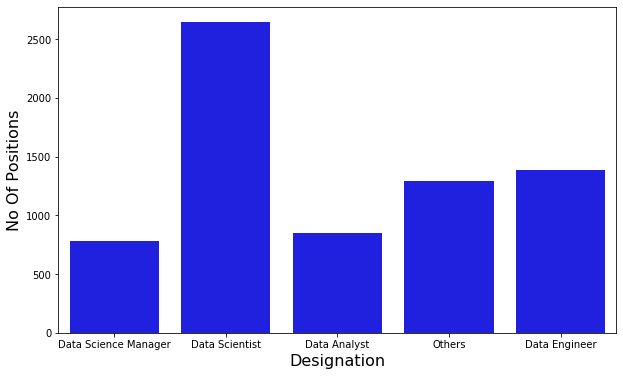

In [16]:
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
fig,a=plt.subplots(figsize=(10,6))   
df_ds=data.copy()
sns.countplot(data=df_ds, x ='position', color='blue')
a.set_ylabel('No Of Positions',fontsize=16,color='black')
a.set_xlabel('Designation',fontsize=16,color='black')

In [17]:
# Renaming al the location in standard format
df_ds.loc[df_ds['location'].str.contains('New York', case=False), 'location'] = 'New York'
df_ds.loc[df_ds['location'].str.contains('San Francisco', case=False), 'location'] = 'San Francisco'
df_ds.loc[df_ds['location'].str.contains('San Diego', case=False), 'location'] = 'San Diego'
df_ds.loc[df_ds['location'].str.contains('Atlanta', case=False), 'location'] = 'Atlanta'
df_ds.loc[df_ds['location'].str.contains('Chicago', case=False), 'location'] = 'Chicago'
df_ds.loc[df_ds['location'].str.contains('Seattle', case=False), 'location'] = 'Seattle'
df_ds.loc[df_ds['location'].str.contains('Boston', case=False), 'location'] = 'Boston'
df_ds.loc[df_ds['location'].str.contains('Boulder', case=False), 'location'] = 'Boulder'
df_ds.loc[df_ds['location'].str.contains('Washington', case=False), 'location'] = 'Washington'
df_ds.loc[df_ds['location'].str.contains('Los Angeles', case=False), 'location'] = 'Los Angeles'
df_ds.loc[df_ds['location'].str.contains('Mountain View', case=False), 'location'] = 'Mountain View'
df_ds.loc[df_ds['location'].str.contains('Cambridge', case=False), 'location'] = 'Cambridge'
df_ds.loc[df_ds['location'].str.contains('Sunnyvale', case=False), 'location'] = 'California'
df_ds.loc[df_ds['location'].str.contains('CA', case=True), 'location'] = 'California'
df_ds.loc[df_ds['location'].str.contains('NJ', case=True), 'location'] = 'New Jersey'
df_ds.loc[df_ds['location'].str.contains('NY', case=True), 'location'] = 'New York'
df_ds.loc[df_ds['location'].str.contains('TX', case=True), 'location'] = 'Texas'
df_ds.loc[df_ds['location'].str.contains('WA', case=True), 'location'] = 'Washington'

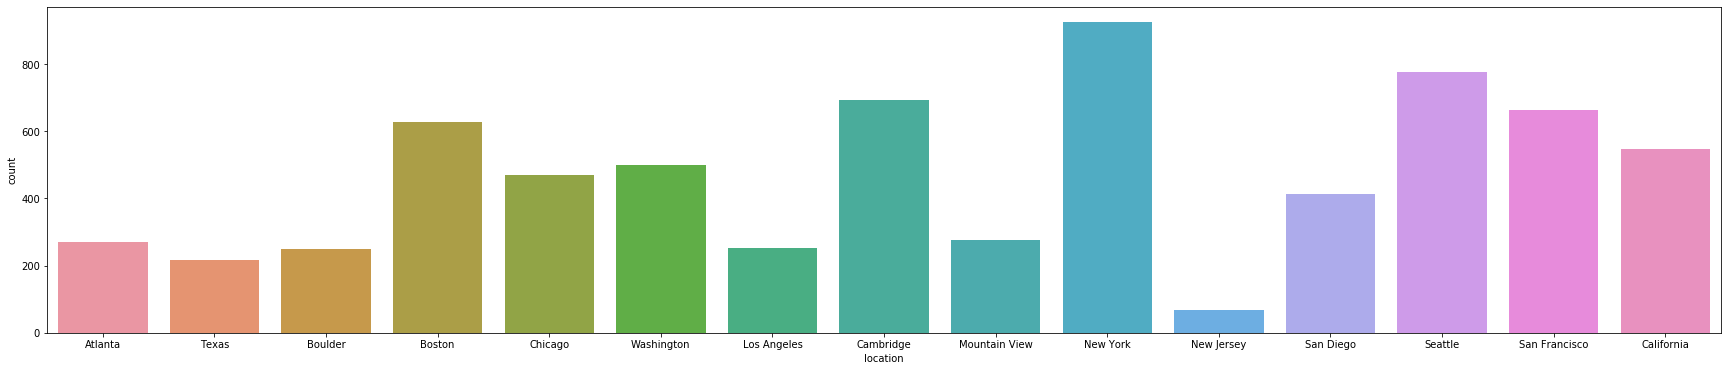

In [19]:
from matplotlib.pyplot import figure, show
width=30
height=6
figure(figsize=(width,height))
#sns.barplot(data=df.groupby(['location'])['position'].count().reset_index(), x='location', y='position')
sns.countplot(data=df_ds, x='location')
show()

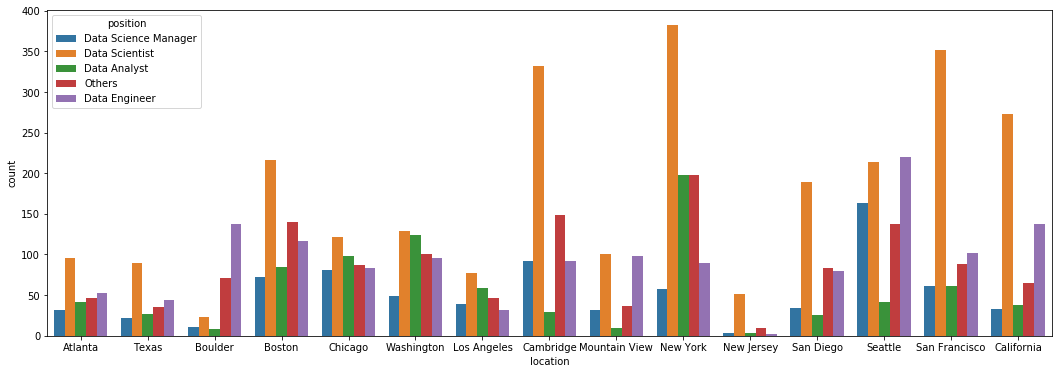

In [20]:
from matplotlib.pyplot import figure, show
width=18
height=6
figure(figsize=(width,height))
sns.countplot(data=df_ds, x='location',hue='position')
show()

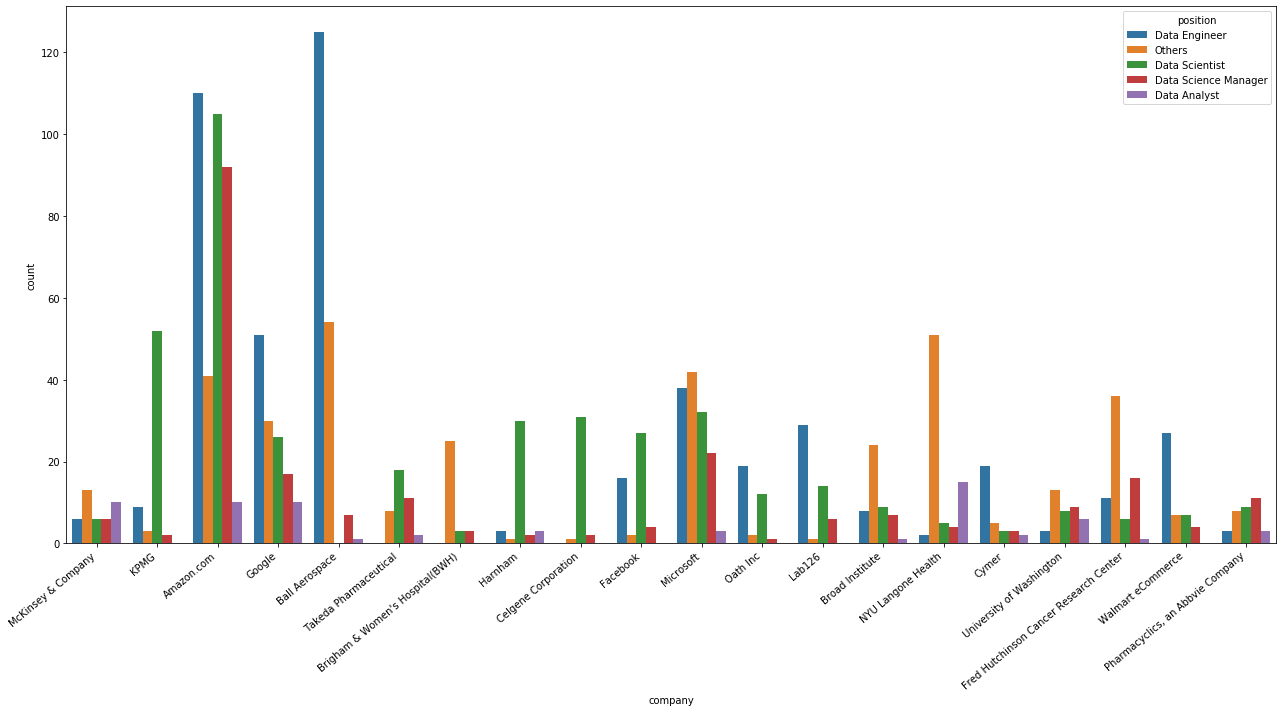

In [21]:

top_20_company_list = df.groupby(['company'])['location'].count().reset_index().sort_values('location',ascending=False).head(20)['company'].tolist()
# Based on the previous graph we have only figured out total open positions at every location
# It would be more intuitive if we know different designated open positions at each location, let us plot that.
# It can be achieved by adding hue to the above countplot
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
fig,a=plt.subplots(figsize=(18,10))   
ax = sns.countplot(data=df_ds[df_ds['company'].isin(top_20_company_list)], x='company',hue='position')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [22]:
# Next Part in ML Algorithm is Data Cleansing
X=data.description
Y=data.position

X=[re.sub(r"[^a-zA-Z0-9]+", ' ', k) for k in X]
X=[re.sub("[0-9]+",' ',k) for k in X]

#applying stemmer
ps =PorterStemmer()
X=[ps.stem(k) for k in X]

#Note: I have not removed stop words because there are important key words mentioned in job description which are of length 2, I feel they have weightage while classifing
tfidf=TfidfVectorizer()
label_enc=LabelEncoder()

X=tfidf.fit_transform(X)
Y=label_enc.fit_transform(Y)

x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.3)

In [23]:
#Naive Bayes classification
NB=MultinomialNB()
NB.fit(x_train,y_train)
NB_y=NB.predict(x_test)

print('Accuracy of NB :', accuracy_score(y_test,NB_y))
print ('Confusion Matrix of NB : ', '\n\n', confusion_matrix(y_test,NB_y))

#crossfold Validation of 7 folds for NB
cross_val_NB=sklearn.model_selection.cross_validate(NB, x_train, y=y_train,cv=7)

Accuracy of NB : 0.4098753595397891
Confusion Matrix of NB :  

 [[  0   0   0 254   0]
 [  0  50   0 365   0]
 [  0   5   0 228   1]
 [  0   0   0 794   0]
 [  0  17   0 361  11]]


In [24]:
#3rd Classifier SGDC
#SGD classification
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
sgd_y=sgd.predict(x_test)

print('Accuracy of SGD :', accuracy_score(y_test,sgd_y))
print ('Confusion Matrix of SGD : ', '\n\n', confusion_matrix(y_test,sgd_y))

#crossfold Validation of 7 folds for SGD
cross_val_SGD=sklearn.model_selection.cross_validate(sgd, x_train, y=y_train,cv=7)

Accuracy of SGD : 0.7847555129434324
Confusion Matrix of SGD :  

 [[202   5  12  19  16]
 [  6 343   5  43  18]
 [  3  16 149  35  31]
 [  9  15  18 715  37]
 [ 15  31  30  85 228]]


In [25]:
#4th Classifier 
#XGBOOST classification
#xgboost=GradientBoostingClassifier(n_estimators=90)
#xgboost.fit(x_train,y_train)
#xgboost_y=xgboost.predict(x_test)

#print('Accuracy of XGBOOST :', accuracy_score(y_test,xgboost_y))
#print ('Confusion Matrix of XGBOOST : ', '\n\n', confusion_matrix(y_test,xgboost_y))

#crossfold Validation of 7 folds for SGD
#cross_val_xgboost=sklearn.model_selection.cross_validate(xgboost, x_train, y=y_train,cv=7)

#print ('XGBOOST Train fit score is : ', '\n\n', cross_val_xgboost ['train_score'])
#print ('XGBOOST TEST score is : ', '\n\n', cross_val_xgboost ['test_score']) 
# Inverse Transform of label Encoder
print (label_enc.inverse_transform([0,1,2,3,4]))

['Data Analyst' 'Data Engineer' 'Data Science Manager' 'Data Scientist'
 'Others']


## CONCLUSION

Based on the graph plots between location and company designation, we can observe that the Data Scientist role is high in demand across any company and any location. However, if we are taking only one location, in particular, New York has a lot of open positions for different roles out there. Also, company wise Amazon, Google, KPMG has many positions for the role of Data Scientist.